# <center>SENG 480D: Quantum Algorithms and Software Engineering </center>
# <center> Term Portfolio Project </center>
## <center> Hsu, Leo: V00928098</center>

# Part 1
## Introduction
In this project, we will record our learning journey in quantum computing. In particular, we give a summary of what we've learnt so far, what our struggles were, and things that are thought to be important to take note of.

## 1 Linear Algebra
It is already interesting that the study of quantum mechanics has two different formulations come up with independently, where one involves Schrödinger equation and the other uses linear algebra. The two formulations are then shown to be equivalent, and we hence have two characterizations of quantum mechanics.

Since linear algebra seems more intuitive and it is a lot easier to work with than partial differential equations, it is then natural that we take the linear algebra as the primary approach to quantum computation formulations.

Having taken MATH 311 (abstract linear algebra) at UVic, I have already gained extensive experience in the concepts of linear transformtaions/operators, eigenvectors/eigenvalues, etc, and so am readily set in position to study quantum computing with the linear algebraic approach.

### Dirac Notation
Getting used to the Dirac notation at the beginning was a bit challenging, since Dirac notation is not widely used in the mathematical field (as opposed to physics). But after realizing that in Dirac notation, the computational basis vectors (states) for the vector space that an n-qubit state is in are in some correspondence with their binary representation when viewed as n-bit strings, familiarity with the notation was then picked up fast. For example, for a 3-qubit state $|010\rangle$ in Dirac notation, if viewed as the binary string $010$, which, in decimal represents the number $2$, the vector representation of the state is
$$
\begin{bmatrix}
0 \\
0 \\
1 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix},
$$
which is the vector with $1$ in the $2^{\text{nd}}$ endtry (indexing from $0$) with $0$'s everywhere else. 

### Matrix Representation of Quantum Gates
One other amazing fact in linear algebra that has helped me in easily producing a matrix representation of a linear operator (in our case, a quantum gate) when given a linear operator (i.e., when given a description of what a quantum gate does). That is, basic linear algebra tells us that a linear operator is completely determined by what it does to an (ordered) basis, (in our case, we just order the computational basis states in the natural order) and that the matrix representation with respect to that basis is then given by the matrix with each column being the image of the corresponding basis vector under the linear map. For example, the (usual) CNOT gate is defined as follows: <br>
$\text{CNOT}|00\rangle = |00\rangle$, $\text{CNOT}|01\rangle = |01\rangle$, $\text{CNOT}|10\rangle=|11\rangle$, and $\text{CNOT}|11\rangle=|10\rangle$, and so the matrix representation of the CNOT gate is then given by: 
$$
\begin{bmatrix}
\text{CNOT}|00\rangle & \text{CNOT}|01\rangle & \text{CNOT}|10\rangle & \text{CNOT}|11\rangle
\end{bmatrix} =
\begin{bmatrix}
|00\rangle & |01\rangle & |11\rangle & |10\rangle
\end{bmatrix}
$$
$$
=
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}.
$$

### Bloch Sphere
We also note here something very interesting in terms of the geometric representation of a 1-qubit quantum state. Let us consider the following: <br>
Given a general 1-qubit quantum state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$, $\alpha, \beta \in \mathbb{C}$ where $\alpha = a + bi$ and $\beta = c + di$, $a, b, c, d \in \mathbb{R}$. Thus, in fact, the usual mathematical representation of a 1-qubit state requires four (real) parameters $a, b, c,$ and $d$. But it turns out that we can actually do better than this, and we see this by putting the qubit states into correspondence with the points on the surface of a Bloch sphere (unit sphere centred around the origin). With the help of Euler's formula ($e^{ix} = cos(x) + isin(x$)) and noting that the global phase can be ignored, it can be shown that
$$
|\psi\rangle = cos\left(\frac{\theta}{2}\right)|0\rangle + sin\left(\frac{\theta}{2}\right)e^{i\phi}|1\rangle,
$$
where $\theta$ represents the angle between the positive $z$-axis and $|\psi\rangle$, and $\phi$ represents the angle between the positive $x$-axis and the projection of $|\psi\rangle$ to the $xy$-plane. To this end, we may represent a general 1-qubit state with only two parameters $\theta$ and $\phi$ with a clear geormetric representation.

## 2 Typesetting 

As a math major, I am no stranger to the $\LaTeX$ typesetting system. However, typing up documents on Jupyter Notebook in $\LaTeX$ is somewhat of a different experience from producing an ordinary TEX file, in that we may incorporate cells of Python code and/or Q# code and run it in real time; to wit, the overall structure of documenting is more robust and interactive. As a demonstration, suppose we want to draw a quantum circuit to produce the 2-qubit state $|\psi\rangle = \frac{1}{2}\left(|00\rangle + |01\rangle + |10\rangle + |11\rangle \right)$ using Qiskit, then we may run the Python code as follows: 

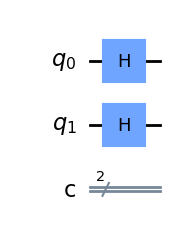

In [1]:
from qiskit import *
circ = QuantumCircuit(2, 2)
circ.h(range(2))
circ.draw('mpl')

And we may prove that the above circuit results in the correct state using $\LaTeX$ as follows: <br>
The resulting quantum state of the above circuit is given by 
$$
\left(H \otimes H\right) \left(|0\rangle \otimes |0\rangle\right) = \left(H|0\rangle \right) \otimes \left(H|0\rangle \right) = |+\rangle \otimes |+\rangle
$$
$$
= \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle \right) \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle \right)
$$
$$
= \frac{1}{2}\left(|00\rangle + |01\rangle + |10\rangle + |11\rangle \right),
$$
and so we're done.

It is also very convenient to have $\LaTeX$ at our fingertips, because it is extremely helpful to have a cheat sheet of quantum computing formulas (identities). For instance, this is a subset of what I have so far: <br>
**Basic Calculations with the Pauli Gates**:
- $X|0\rangle = |1\rangle$; $X|1\rangle = |0\rangle$, where 
$
X =
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$
- $Y|0\rangle = i|1\rangle$; $Y|1\rangle = -i|0\rangle$, where 
$
Y =
\begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix}
$
- $Z|0\rangle = |0\rangle$; $Z|1\rangle = -|1\rangle$, where 
$
Z =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$
- $H|0\rangle = |+\rangle$; $H|1\rangle = |-\rangle$, where 
$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$
and $|\pm\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle \pm |1\rangle\right)$ <br>

**Some Identites**:
- $HXH = Z$
- $HZH = X$ <br>

**Bell Basis States**:
- $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$
- $|\Phi^-\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle\right)$
- $|\Psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$
- $|\Psi^-\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle - |10\rangle\right)$

**Phase-shift Gates**: <br>
For a phase $\phi$, the phase-shift operator is
$$
P(\phi) =
\begin{bmatrix}
1 & 0 \\
0 & e^{i\phi}
\end{bmatrix}.
$$
In particular, we have gates specialized to particular phases: 
- T gate: $T = P\left(\frac{\pi}{4}\right)$
- S gate: $S = P\left(\frac{\pi}{2}\right)$

## 3 Quantum Programming

So far, we have been introduced to online platforms for quantum computing such as **IBM Quantum Experience** and **Microsoft Azure Quantum**; programming languages such as **Qiskit (using Python)** and **Q#**.

One thing to note here is that we may have Q# (using 'magic' commands) programs and Qiskit programs coexist in a Python Jupyter notebook. 

As seen in the previous section, we have demonstrated a simple case of using Qiskit with Python to program. It is proabably readily clear to the reader that Qiskit is a fairly straightforward means to create quantum programs. Whereas Q#, in my honest opinion, as far as user-friendliness, it does not do nearly as good a job as Qiskit. One of the reasons that is is that Q# is based on the programming language C# which I have never gotten my hands on. Moreover, Q# involves more of an abstraction from the quantum circuits that we see as in Qiskit, and is not usually the case that circuits are drawn to be shown in Q# programs (even though this can still be done).

To this end, although it is essential that we are exposed to a wide variety of quantum programming platforms and languages, I believe Qiskit will suffice in modern quantum programming applications.

## 4 Quantum Algorithms

So far, we have seen in lectures (and assignments) the following quantum algorithms:
- **Deutsch-Jozsa Algorithm**: This algorithm answers the question of whether or not a function $f: \{0, 1\}^n \rightarrow \{0, 1\}$ is constant or balanced (given that we already know it is either constant or balanced).

- **BB84 (Quantum Key Distribution Protocol)**: This algorithm allows messages to be sent within the honest parties with the presence of an eavesdropping adversary with high proabability that the message being sent is secure from the adversary.

- **Grover's Algorithm**: This is a search algorithm with the objective of finding a particular element in an unstructured search space with high probability.

The above three algorithms that I personally prefer the most is the Deutsch-Jozsa Algorithm. That is since, first of all, it is the first quantum algorithm that I have ever seen, also, this algorithm gives the correct result with 100% probability, and lastly, this algorithm yields an exponential quantum speed-up with respect to the runtime of a classical solution, which is truly amazing.

One thing to note about BB84 is that it only works when encrypting random messages (messages that probably don't have any useful meanings), and so I believe this algorithm isn't particularly practical.

Lastly, it is already interesting Grover's algorithm does not require an exhaustive search to find the element of interest in the search space with high probability. It is probably not proper to ask for every algorithm to succeed with 100% probability like Deutsch-Jozsa, but Grover's algorithm allows one to set the error tolerance by performing a sufficient number of 'inversion about the mean', and is therefore widely accepted as an efficient search algorithm.

# Part 2
We continue intoducing and documenting new concepts and algorithms that have yet to be introduced in the first half of the course.

## 5 More (Sophisticated) Quantum Algorithms

In what follows, we go into depth on the quantum algorithms that were introduced in the second half of the course.

### 5.1 Quantum Fourier Transform (QFT)

In essence, the Quantum Fourier Transform transforms quantum states in computational basis to their equivalent states in the Fourier basis. But before giving the formula of the QFT, we introduce a useful notation.

#### Quantum States in Computational Basis Written in Decimal Notation

Suppose we have an $n$ qubit computational basis state $|\psi\rangle = |\psi_1\psi_2\cdots\psi_n\rangle$, and in what follows, we may (and do) view (and write) $|\psi\rangle$ as 
$$
|\phi\rangle,
$$

where $\phi = \sum_{i=1}^{n}\psi_i\cdot 2^{n-i}$. Conversely, given $\phi \in \mathbb{N}\cup\{0\}$ with $\phi \leq 2^n$ for some $n$, we identify the state $|\phi\rangle$ with
$$
|\psi_1\psi_2\cdots\psi_n\rangle,
$$

where, again, $\phi = \sum_{i=1}^{n}\psi_i\cdot 2^{n-i}$. In other words, we write a standard quantum state as its decimal representation as a short hand ($|\phi\rangle$ is short for $|\phi_{\text{binary}}\rangle$). With this in mind, we are now in position to give the formula of the QFT:

#### Fourier Basis

Given an $n$ qubit state $|\psi\rangle$ in its computational basis (written in its decimal notation), we have
$$
QFT|\psi\rangle = \frac{1}{\sqrt{N}}\sum_{\phi=0}^{N-1}e^{\frac{2\pi\cdot i\cdot \psi\phi}{N}}|\phi\rangle,
$$

where $N=2^n$
Interestingly enough, one can verify that the Fourier basis coincides with the Hadamard basis when $n=1$. That is,
$$
QFT|0\rangle = |+\rangle, \text{ and } QFT|1\rangle = |-\rangle.
$$

#### Derivation of The Formula

We now claim that we may further simplify the above formula and hence uncover how quantum circuits can be built to execute the Quantum Fourier Transform. Although revealing the structure of the Fourier basis takes a bit of work, it is not a bad idea to derive it here, as it would grant us some more clarity on the mathematics used behind it (this also wasn't immediately clear to me during the lecture when this was derived). To this end, we let $|\psi\rangle$ be an $N$ qubit state (in its computational basis and written in its decimal notation), then
$$
QFT|\psi\rangle = \frac{1}{\sqrt{N}}\sum_{\phi=0}^{N-1}e^{\frac{2\pi\cdot i\cdot \psi\phi}{N}}|\phi\rangle
$$
$$
 = \frac{1}{\sqrt{N}}\sum_{\phi=0}^{N-1}e^{\frac{2\pi\cdot i\cdot \psi\sum_{k=1}^{n}\phi_k\cdot2^{n-k}}{N}}|\phi_1\cdots\phi_n\rangle
$$
$$
\text{(converted the decimal notation back to the binary notation of states)}
$$
$$
= \frac{1}{\sqrt{N}}\sum_{\phi=0}^{N-1}e^{\frac{2\pi\cdot i\cdot \psi\sum_{k=1}^{n}\phi_k\cdot2^{n-k}}{2^n}}|\phi_1\cdots\phi_n\rangle
$$
$$
= \frac{1}{\sqrt{N}}\sum_{\phi=0}^{N-1}e^{2\pi\cdot i\cdot \psi\sum_{i=k}^{n}\frac{\phi_k}{2^k}}|\phi_1\cdots\phi_n\rangle
$$
$$
\text{(product rule for exponents)}
$$
$$
= \frac{1}{\sqrt{N}}\sum_{\phi=0}^{N-1}\prod_{k=1}^{n}e^{2\pi\cdot i\cdot \psi\cdot\frac{\phi_k}{2^k}}|\phi_1\cdots\phi_n\rangle
$$
$$
= \frac{1}{\sqrt{N}}\sum_{\phi=0}^{N-1}\left(e^{2\pi\cdot i\cdot \psi\cdot\frac{\phi_1}{2^1}}\cdots e^{2\pi\cdot i\cdot \psi\cdot\frac{\phi_n}{2^n}}\right)\left(|\phi_1\rangle \otimes \cdots \otimes |\phi_n\rangle\right)
$$
$$
= \frac{1}{\sqrt{N}}\sum_{\phi=0}^{N-1}\left(e^{2\pi\cdot i\cdot \psi\cdot\frac{\phi_1}{2^1}}|\phi_1\rangle \otimes \cdots \otimes e^{2\pi\cdot i\cdot \psi\cdot\frac{\phi_n}{2^n}}|\phi_n\rangle\right)
$$
$$
\text{(since each } \phi_k \text{ is either 1 or 0 and we run through all the possibilities)}
$$
$$
= \frac{1}{\sqrt{N}}\sum_{\phi_1=0}^{1}\cdots\sum_{\phi_n=0}^{1}\left(e^{2\pi\cdot i\cdot \psi\cdot\frac{\phi_1}{2^1}}|\phi_1\rangle \otimes \cdots \otimes e^{2\pi\cdot i\cdot \psi\cdot\frac{\phi_n}{2^n}}|\phi_n\rangle\right)
$$
$$
\text{(by the property of tensor products that }(A\otimes B) + (A \otimes C) = A \otimes (B+C) \text{ )}
$$
$$
= \frac{1}{\sqrt{N}}\left(\sum_{\phi_1=0}^{1}e^{2\pi\cdot i\cdot \psi\cdot\frac{\phi_1}{2^1}}|\phi_1\rangle \right)\otimes\cdots\otimes\left(\sum_{\phi_n=0}^{1}e^{2\pi\cdot i\cdot \psi\cdot\frac{\phi_n}{2^n}} |\phi_n\rangle\right)
$$
$$
= \frac{1}{\sqrt{N}}\left(e^{2\pi\cdot i\cdot \psi\cdot\frac{0}{2^1}}|0\rangle + e^{2\pi\cdot i\cdot \psi\cdot\frac{1}{2^1}}|1\rangle \right)\otimes\cdots\otimes\left(e^{2\pi\cdot i\cdot \psi\cdot\frac{0}{2^n}}|0\rangle+e^{2\pi\cdot i\cdot \psi\cdot\frac{1}{2^n}}|1\rangle \right)
$$
$$
= \frac{1}{\sqrt{N}}\left(|0\rangle + e^{2\pi\cdot i\cdot \psi\cdot\frac{1}{2^1}}|1\rangle \right)\otimes\cdots\otimes\left(|0\rangle+e^{2\pi\cdot i\cdot \psi\cdot\frac{1}{2^n}}|1\rangle \right).
$$

Thus, 
$$
QFT|\psi\rangle = QFT|\psi_1\cdots\psi_n\rangle = \frac{1}{\sqrt{N}}\left(|0\rangle + \frac{e^{2\pi\cdot i\cdot \psi}}{2^1}|1\rangle \right)\otimes\cdots\otimes\left(|0\rangle + \frac{e^{2\pi\cdot i\cdot \psi}}{2^n}|1\rangle\right),
$$
$$
= \frac{1}{\sqrt{2}}\left(|0\rangle + \frac{e^{2\pi\cdot i\cdot \psi}}{2^1}|1\rangle \right)\otimes\cdots\otimes\frac{1}{\sqrt{2}}\left(|0\rangle + \frac{e^{2\pi\cdot i\cdot \psi}}{2^n}|1\rangle\right)
$$

and so we see that in general, the $k^{\text{th}}$ qubit $|\psi_k\rangle$ gets "transformed" to the state $\frac{1}{\sqrt{2}}\left(|0\rangle + \frac{e^{2\pi\cdot i\cdot \psi}}{2^k}|1\rangle\right)$.

We recall now from Assignment 2 Part 1 the following useful unitary operator which will be a great tool for the implementation of the circuit for QFT:

#### Rotation Unitary Matrix

Let $k \in \mathbb{N}$, then the unitary matrix

$$
U_{{\text{ROT}}_k}=
\begin{bmatrix}
1 & 0 \\
0 & e^{\frac{2\pi i}{2^k}}
\end{bmatrix},
$$

when applied to a general one-qubit state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, applies a phase of $e^{\frac{2\pi i}{2^k}}$ to $|1\rangle$, which should seem to be alluding to something we saw in each qubit of the above Fourier basis state. As it turns out, we do indeed use these operators when implementing the circuit for QFT, execept, they are used as controlled operators. Moreover, geometrically, as also seen in Assignment 2 Part 1, $U_{{\text{ROT}}_k}$ actually rotates a state about the z-axis by an angle of $\frac{\pi}{2^{k-1}}$ in its Bloch Sphere representation. 

#### Circuit Implementation of QFT

We give below (using Qiskit) an example of QFT for 3 qubits, and the case for $n$ qubits will then be straightforward to generalize.

We also note here that from Section 2, we've seen the phase shift gate $P(\phi)$, and in particular, we have
- $$U_{{\text{ROT}}_2}=
\begin{bmatrix}
1 & 0 \\
0 & e^{\frac{2\pi i}{2^2}}
\end{bmatrix} = \begin{bmatrix}
1 & 0 \\
0 & e^{i\frac{\pi}{2}}
\end{bmatrix} = P\left(\frac{\pi}{2}\right)$$


- $$U_{{\text{ROT}}_3}=
\begin{bmatrix}
1 & 0 \\
0 & e^{\frac{2\pi i}{2^3}}
\end{bmatrix} = \begin{bmatrix}
1 & 0 \\
0 & e^{i\frac{\pi}{4}}
\end{bmatrix} = P\left(\frac{\pi}{4}\right).$$

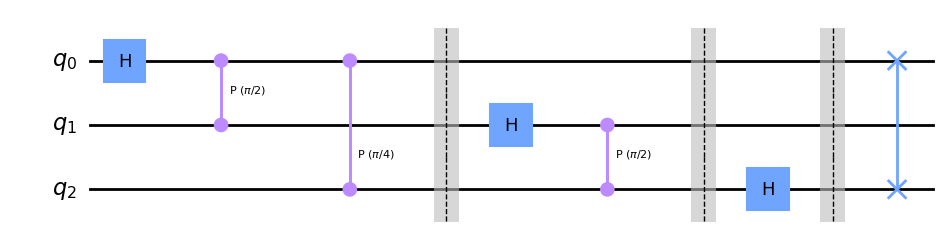

In [2]:
from qiskit import *
import numpy as np
QFT = QuantumCircuit(3)
QFT.h(0)
QFT.cp(np.pi/2, 1, 0)
QFT.cp(np.pi/4, 2, 0)
QFT.barrier(range(3))
QFT.h(1)
QFT.cp(np.pi/2, 2, 1)
QFT.barrier(range(3))
QFT.h(2)
QFT.barrier(range(3))
QFT.swap(0, 2)
QFT.draw('mpl')

where the swap at the end is necessary, since otherwise the outcome of the circuit will be exactly backwards from the result of applying the QFT.

Now, we implement below (using Q#) an operation that performs QFT in the general case (i.e., on a given set of input qubits).

In [3]:
import qsharp

Preparing Q# environment...
.

In [4]:
%%qsharp
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Canon;
open Microsoft.Quantum.Arithmetic;
open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Math;
open Microsoft.Quantum.Convert;

In [5]:
%%qsharp
operation QuantumFourierTransform(qs : Qubit[]) : Unit is Adj+Ctl {
    for i in 0 .. Length(qs)-1 {
        H(qs[i]);
        for j in 2 .. Length(qs)-i {
            Controlled Rz([qs[i+j-1]], (PI()/PowD(2.0, IntAsDouble(j-1)), qs[i]));
            
        }
    }   
    for k in 0 .. Length(qs)/2 - 1 {
        let swap = Length(qs)-1-k;
        SWAP(qs[k],qs[swap]);
    }
}    


#### Applications of QFT

Quantum Fourier Transform is indeed one of the most important building blocks in the field of quantum algorithms. One of its major contributions is to **Shor's Algorithm**, which is a quantum algorithm has been shown to be able to determine the prime factorization of large numbers, which is classically an intractable problem (NP, in this case). We therefore see that the ramifications of the existence of Shor's Algorithm are not to be ignored, as a lot of our modern encryption schemes depend highly on the hardness of the factoring problem.

Although the use of Quantum Fourier Transform is not limited only to the factoring problem, we introduce another quantum algorithm in which the inverse (which is coincidentally the dagger) of the QFT is used. In particular, we move on to the following subsection.

### 5.2 Quantum Phase Estimation (QPE)

In quantum computing, every quantum gate is represented by a **unitary operator** (i.e., a unitary linear transformation $U: \mathbb{C}^{2^n}\rightarrow \mathbb{C}^{2^n}$ for an $n$-qubit quantum gate). With this in mind,  we motivate below what we are trying to achieve with QPE.

#### Eigenvalues and Eigenvectors (Eigenstates)

Let $A\in \mathbb{C}^{2^n\times2^n}$ be a linear operator. We say that $x\in\mathbb{C}^{2^n}$ is an **eigenvector** of $A$ with $\lambda\in\mathbb{C}$ as its corresponding **eigenvalue**, when

$$
Ax = \lambda x.
$$

Note that when $x$ is viewed as an $n$-qubit state, then we say $x$ is an **eigenstate**. The notion of eigenvalues and eigenvectos plays a signifcant role in mathematical designs and modellings of many real world applications, and so it is important to be able to efficiently find the (if not an estimation of) eigenvalues of a given matrix. Furthermore, finding eigenvalues and eigenvectors of linear transformations is also needed for a lot of the quantum algorithms that are known, we therefore cannot stress enough the importance of the eigenvalue problem.

#### Unitary Operators (Matrices)

Basic linear algebra tells us that any eigenvalue of a unitary operator (matrix) over $\mathbb{C}$ has **unit norm** (modulus $1$), and so by Euler's formula, we may represent any such eigenvalue in $\mathbb{C}$ by

$$
e^{2\pi i \theta}
$$

for some $0 \leq \theta < 1$, and so if $U$ is a unitary operator with eigenstate $|\psi\rangle$ having the corresponding eigenvector $e^{2\pi i \theta}$, then

$$
U|\psi\rangle = e^{2\pi i \theta}|\psi\rangle.
$$

#### Fractional Binary

Although, of an eigenvalue of $e^{2\pi i \theta}$ we may not always be able to find an exact value, since $0\leq \theta < 1$, we may estimate with arbitrary precision using the notaion of **fractional binary**, and it is defined as follows:

$$
\theta = 0.\theta_1\theta_2 \cdots \theta_n = \frac{\theta_1}{2^1}+\frac{\theta_2}{2^2}+\cdots+\frac{\theta_n}{2^n} = \sum_{k=1}^n\frac{\theta_k}{2^k},
$$

where each $\theta_k \in \{0, 1\}$.

It is strightforward to see that a value between $0$ and $1$ can be approximated arbitrarily close (if not exactly) with fractional binary as the number of bits increases, and so if we want $t$ bits of precision, we would need $t$ estimation wires. In general, if we have $t$ many estimation qubits, the estimation value is accurate up to an error of $\frac{1}{2^t}$.

#### Basic Idea and Intuition Behind the Circuit Implementation of QPE
If we wish to achieve a $t$-bit precision of the phase angle $\theta$, in the circuit implementation of the QPE, we have $t$ **estimation qubits** and an $n$ **target qubits** (or **input qubits**) for an $n$ qubit state $|\psi\rangle$ that we wish to estimate the phase angle $\theta = 0.\theta_1\theta_2\cdots\theta_t$ of the eigenvalue $e^{2\pi i\theta}$ of, with respect to an $n$-qubit gate $U$. 

Also, we again make use of the Hadamard Transform to put the first $t$-estimation qubits in equal superposition states. To this end, suppose we apply a controlled-$U^{2^k}$ gate with the $(t-k)^{\text{th}}$ being the control qubit, and the target being the $n$ target qubits. Then due to **phase kickback**, the phase gets "kicked back" on to the estimation wires, and so $|\psi\rangle$ remains unchanged. Noting that applying $U$, $2^k$ times we move $k$ places to the right. That is,

$$
U^{2^k}|\psi\rangle = e^{2^k\cdot2\pi i\theta}|\psi\rangle = e^{2^k\cdot2\pi i\cdot0.\theta_1\theta_2\cdots\theta_t}|\psi\rangle = e^{2\pi i\cdot\theta_1\theta_2\cdots\theta_k.\theta_{k+1}\cdots\theta_t}|\psi\rangle = e^{2\pi i\cdot0.\theta_{k+1}\cdots\theta_t}|\psi\rangle
$$

Thus, the controlled-$U^{2^k}$ kicks back the following phase (onto the $(t-k)^{\text{th}}$ estimation qubit):

$$
CU^{2^k}\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle \right) = \frac{1}{\sqrt{2}}\left(|0\rangle + U^{2^k}|1\rangle \right) = \frac{1}{\sqrt{2}}\left(|0\rangle + e^{2\pi i\cdot0.\theta_{k+1}\cdots\theta_t}|1\rangle \right).
$$

To this end, after performing the procedure described above for each $0\leq k \leq t-1$, we are in state

$$
\left(\frac{1}{\sqrt{2}}\right)^t \left(|0\rangle + e^{2\pi i 0.\theta_t}\right)\otimes \left(|0\rangle + e^{2\pi i 0.\theta_{t-1}\theta_t}\right) \otimes \cdots \otimes \left(|0\rangle + e^{2\pi i 0.\theta_1\theta_2\cdots\theta_t}\right)\otimes|\psi\rangle
$$
$$
 = \frac{1}{\sqrt{2}}\left(|0\rangle + e^{2\pi i 0.\theta_t}\right)\otimes \frac{1}{\sqrt{2}}\left(|0\rangle + e^{2\pi i 0.\theta_{t-1}\theta_t}\right) \otimes \cdots \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + e^{2\pi i 0.\theta_1\theta_2\cdots\theta_t}\right)\otimes|\psi\rangle,
$$

which is extremely reminiscent of Quantum Fourier Transform in the previous subsection. We recall now from the QFT that

$$
QFT|x\rangle = QFT|x_1\cdots x_n\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + \frac{e^{2\pi\cdot i\cdot x}}{2^1}|1\rangle \right)\otimes\cdots\otimes\frac{1}{\sqrt{2}}\left(|0\rangle + \frac{e^{2\pi\cdot i\cdot x}}{2^n}|1\rangle\right)
$$
$$
= QFT|x_1\cdots x_n\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + \frac{e^{2\pi\cdot i0.x_n}}{2^1}|1\rangle \right)\otimes\cdots\otimes\frac{1}{\sqrt{2}}\left(|0\rangle + \frac{e^{2\pi\cdot i0.x_1x_2\cdots x_n}}{2^n}|1\rangle\right).
$$

It therefore only remains to apply the inverse of the $QFT$ ($QFT^{-1} = QFT^{\dagger}$) on the $t$ estimation qubits to measure with $100$% probability the phase angle estimated using $t$ bits of precision in fractional binary. That is,

$$
QFT^{\dagger}\left[ \frac{1}{\sqrt{2}}\left(|0\rangle + e^{2\pi i 0.\theta_t}\right)\otimes \frac{1}{\sqrt{2}}\left(|0\rangle + e^{2\pi i 0.\theta_{t-1}\theta_t}\right) \otimes \cdots \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + e^{2\pi i 0.\theta_1\theta_2\cdots\theta_t}\right) \right] = |\theta_1\cdots\theta_t\rangle.
$$

#### Circuit Implementation of QPE

With the (adjointable) QFT implemented with the Q# in the previous subsection, we give a circuit implementation of QPE for a general $t$ but $n=1$ (i.e., we consider single qubit unitary matrices).

In [6]:
%%qsharp
operation ControlledUnitaries(estimation_qs : Qubit[], U : (Qubit => Unit is Ctl + Adj), target_qubit : Qubit) : Unit {
    for i in 0 .. Length(estimation_qs)-1 {
        let exp = Length(estimation_qs)-1-i;
        let power = 2^exp;
        Controlled OperationPowCA(U, power)([estimation_qs[i]], target_qubit);
    }
}
    
    
function ThetaDecimal(theta_bin : Int[]) : Double {
    mutable val = 0.0;
    for i in 0  .. Length(theta_bin)-1 {
        let pow = 2^(i+1);
        set val += (IntAsDouble(theta_bin[i])/IntAsDouble(pow));
    }
    return val;
}

The **operation** ```ControlledUnitaries``` applies the controlled unitary $U$ according to the QPE algorithm given an array of control (estimation) qubits and a target qubit; the **function** ```ThetaDecimal``` converts the phase from fractional binary to its decimal value. In what follows, we implement an **operation** ```QPE``` that performs the QPE that uses the $U$ as the $T$ gate, and uses $|\psi\rangle$ as $|1\rangle$ state as an example. Recall from section 2 that 

$$
T =
\begin{bmatrix}
1 & 0 \\
0 & e^{i\frac{\pi}{4}}
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 \\
0 & e^{2\pi i\frac{1}{8}}
\end{bmatrix},
$$

and so it is clear that $T|1\rangle = e^{2\pi i\frac{1}{8}}|1\rangle$, and the phase angle is $\theta = \frac{1}{8} = 0.001 \text{ (in fractional binary) } = 0.125 \text{ (in decimal)}$. We therefore take $t=3$ as the number of our estimation qubits. To this end, we have the following:

In [7]:
%%qsharp
operation QPE(): Double {
    //Use 3 estimation qubits:
    use estimation_qs = Qubit[3];
    use target = Qubit();
    
    //Eigenstate |1>:
    X(target);
    
    //Start of the QPE algorithm
    for i in 0 .. Length(estimation_qs)-1 {
        H(estimation_qs[i]);
    }
    ControlledUnitaries(estimation_qs, T, target);
    Adjoint QuantumFourierTransform(estimation_qs);
    //End of the QPE algotithm
    
    //Interpret Results
    let decodedBits = ForEach((x) => M(x) == One ? 1 | 0, estimation_qs);
    Reset(target);
    return ThetaDecimal(decodedBits);
}

In [8]:
QPE.simulate()

0.125

#### Applications of QPE

One might already be wondering what will happen if the target state is not actually an eigenstate of the unitary operator considered in a particular instance of QPE. However, a very nice property of unitary operators is that the set of eigenvectors of a unitary operator is pair-wise orthogonal, and hence forms a basis (an **eigenbasis**). Therefore, any arbitrary $|\psi\rangle$ can be expressed a linear combination of the eigenvectors. That is,

$$
|\psi\rangle = \sum_{\lambda}c_\lambda |\psi_\lambda\rangle.
$$

The outcome of the QPE when $|\psi\rangle$ is the target state will depend on the amplitude $\lVert c_\lambda\rVert$. In other words, the outcome of the QPE in this case will be $QPE|\psi_\lambda\rangle$ with probability $\lVert c_\lambda\rVert$. With this in mind, an important application of the QPE in **computatinoal chemistry** is finding the ground state energy of a physical system which corresponds to the **minimum eigenvalue** of the system's **Hamiltonian**. To achieve so, the basic idea is to prepare the target state in a way such that in its linear combination of eigenvectors, the coefficent of the eigenvector with the minimum eigenvalue has the largest norm.

I believe it is also worth noting that **Shor's Algorithm**, as mentioned in the previous subsection about Quantum Foureir Transform, also uses QPE as its subroutine. Interestingly enough, we also saw that (the inverse of) the QFT is also used as a subroutine in QPE. It is genuinely satisfying to realize that both the QFT and the QPE are some of the most important building blocks in modern quantum algorithms.


## 6 An Overview of the Variational Quantum Eigensolver (VQE)  and the Quantum            Approximate Optimization Algorithm (QAOA)

As is already mentioned in the previous section, the eigenvalue (eigenvector) problem models physical systems in which the energy of the ground state corresponds to the smallest eigenvalue. We see that in both VQE and QAOA, we deal with the same eigenvalue problem, but we look for actually different things.

### 6.1 VQE

The Variational Quantum Eigensolver is used to find the minimum value of some cost objective, and it is an example of a **hybrid quantum-classical** algorithm in that classical optimization techiques are used to find the optimal parameters of the quantum circuit that calculates the cost function's value. To that end, VQE estimates (upper bound) the **ground state energy** (lowest **eigenvalue**) of a physical system (**Hamiltonian**).

#### Variational Principle
Let $H$ be a hamiltonian, and let $|\psi_\lambda\rangle$ be an eigenstate of $H$ with eigenvalue $\lambda$, then again

$$
H|\psi_\lambda\rangle = \lambda|\psi_\lambda\rangle.
$$

To see that $\lambda$ corresponds to the energy value $E_\lambda$, we introduce here the notion of the **expectation value** of $H$.

For an arbitrary (trial) state $\psi$, the expectation value of $H$ is given by

$$
\langle \psi | H | \psi \rangle = E(\psi).
$$

The expectation of $H$ for $\psi_\lambda$ is then

$$
\langle \psi_\lambda | H | \psi_\lambda \rangle = \langle \psi_\lambda| \left(  H | \psi_\lambda \rangle \right) = \langle \psi_\lambda| \lambda | \psi_\lambda \rangle = \lambda \langle \psi_\lambda| \psi_\lambda\rangle = \lambda\cdot 1 = \lambda = E(\psi_\lambda) := E_\lambda.
$$

With the notion of the expectation value, the **variation principle** tells us that

$$
\langle \psi_\lambda | H | \psi_\lambda \rangle \geq E_0.
$$

That is, the expectation value is an upper bound for the ground state energy, and this makes sense becasue the ground state is defined to be the lowest energy state, and so $E_0$ must be at most any $E_\lambda$. However, just obtaining an upper bound isn't really that satisfying since we don't know how tight the upper bound actually is. While one naive way is to run through every possible state and identify the one with the lowest energy, this isn't really feasible since there is a large number of possible states to try out and some (if not most) of the states will give you a very loose upper bound. We therefore turn to the notion of an **ansatz**.

#### Ansatz

Informally speaking, an **ansatz** is an educated guess of some initial input, and in our case, the ansatz is a random state chosen from a set of candidates (states that are likely to give a low energy values). It is important that our ansatz (parameterized quantum circuit) is parameterized with not too many parameters, since optimizing the energy or the expectation value would be, in this case, the job of a CPU. With some optimization techniques like the **gradient descent**, parameters are adjusted such that the expectation value moves in the direction that would lower it the most, and then the quantum circuit is adjusted accordingly before another iteration of the CPU optimization of the parameters.

### 6.2 QAOA

The Quantum Approximate Optimization Algorithm is a polynomial-time **quantum heuristic** technique that is used to solve **combinatorial optimization** problems. Typically, QAOA finds the **ground state** (eigenstate with the lowest energy) using a variational ansatz where the solution to the combinatorial optimization problem considered is encoded as such a state. But as it turns out, in combinatorial optimization, the eigenstate is one of the computational basis states.

Since Hamiltoinans are **Hermitian**, all eigenvalues of a Hamiltonian $H$ are real. And since every Hermitian matrix is **diagonalizable**, in a diagonalized Hamiltonian

$$
H =
\begin{bmatrix}
\lambda_1 & \cdots & 0\\
\vdots & \ddots & \vdots\\
0 & \cdots & \lambda_n
\end{bmatrix}
$$

has a complete set of eigenvalues (energies) and the corresponding energy eigenstates, and so it makes sense that Hamiltonians are used to describe things that we can measure (energy). QAOA actually helps us because, classically, finding the ground state of a Hamiltonian is NP-Hard.

#### Time Evolution of a Quantum System (Background)

The time evolution of a quantum state is dictated by Schrödinger's equation:

$$
i\mathcal{h}\frac{d}{dt}|\psi(t)\rangle = H|\psi(t)\rangle,
$$

and as it turns out, the general solution of the above equation is

$$
|\psi(t)\rangle = e^{-iHt}|\psi(0)\rangle.
$$

As it also turns out, the operator $e^{-iHt}$ is **unitary**, and so we may use some combination of gates on a gate-based quantum computer to do this transformation.

#### Components of a QAOA Ansatz

Finally, with the preceding comments, it is not surprising that QAOA requires an **ansatz**. We give below an overview of the components of a QAOA ansatz (parameterized trial state):

- Initial state: $|s\rangle$
    - The state on which we build our variational ansatz on.
    
- Phase Separator Hamiltonian/Cost Hamiltonian/Problem Hamiltonian: $H_C$
    - A diagonal operator that is used as the objective operator.
    - The unitary $e^{i\gamma H_c}$, where $\gamma$ is a variational parameter in $[0, 2\pi)$.

- Mixing Hamiltonian: $H_M$
    - It is non-diagonal in the computatonal basis
    - It mixes the states among each other
    - The unitary $e^{i\beta H_M}$, where $\beta$ is a variational parameter in $[0, 2\pi]$. 

### 6.3 VQE vs QAOA

VQE and QAOA are similar in that both are **variational** techniques (which is clear from the above discussions). Moreover, in both, **ansatz** (trial states) are set up, and the optimization of the parameters are done classically. While VQE is mainly used for quantum chemistry and QAOA is mostly used for combinatorial optimization, QAOA can actaully be viewd as a special case of VQE.

To sum up, consider the following: Suppose

$$
U|\psi\rangle = \lambda |\psi\rangle,
$$

then

- In VQE, we wish to find the ground state energy: $\lambda$.

- In QAOA, we aim to find the solution to the problem: $|\psi\rangle$.


## 7 Conclusion

While many other concepts have been glossed over in the course such as (just to name a few), **Quantum Teleportation**, **Quantum Walks**, and **Hybrid Quantum Classical Computing**, it is reasonable to think that there are many other concepts and algorithms/techniques out there in the realm of quantum computing, which has been alluded to by the presentations done by the graduate students in our course on topics such as (also just to name a few) **Quantum Annealing**, **Quantum Cryptography** and **Quantum Machine Learning**. 

After completing this course, I am more than motivated to dig deeper into the field of quantum computing. In particular, as a math major, I am extremely interested in mathematical or algebraic structures such as **groups** and **homomorphic copies of graphs**. Some problem that I have thought of, which I think could possibly make use of quantum advantage to solve, include **finding subgroups of a prescribed size of a given group** and **finding the smallest subgraph of a given graph that can arise as a homomorphic copy of such graph**, which are known to be classically hard to solve.

## 8 References and Acknowledgements

We must thank Dr. Stege, Dr. Müller, and Priya for the amazing lecture slides and assignments for us to be able to reference when creating this project.

Every conecpt that has appeared in this project either references the lecture slides/recordings/assignments of the course, or is introduced by me.